In [461]:
#1
'''
#installing libraries
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install seaborn
!pip install sklearn
!pip install wordcloud
'''

'\n#installing libraries\n!pip install numpy\n!pip install pandas\n!pip install seaborn\n!pip install matplotlib\n!pip install seaborn\n!pip install sklearn\n!pip install wordcloud\n'

In [462]:
#2
# for basic operations
import numpy as np
import pandas as pd

# for basic visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for providing the path
import os
print(os.listdir('C://Users//Swapnil Mishra//Desktop//TCS INFRAMIND//sentidatalyzer'))

['.vscode', 'app.py', 'data.csv', 'data.ipynb', 'Output.csv', 'static', 'templates']


In [463]:
#3
data = pd.read_csv('data.csv', delimiter = ',', quoting = 3)

# getting the shape of the data
data.shape

(23, 7)

In [464]:
#4
data.head()

,Name,Date of order,Prodtype,Rating,Feedback,Comment,Score
0,Aayushi,2021-01-02,Product Type 2,4,good,Positive,1
1,Reshmi,2020-12-23,Product Type 1,4,Not worth it cheap quality products..needs rep...,Negative,-1
2,Rohini,2020-12-12,Product Type 4,3,The dress is okay,Positive,1
3,Rahul,2020-12-04,Product Type 5,1,Pathetic texture and outlook please exchange,Negative,-1
4,Ranbir,2020-04-12,Product Type 3,3,The item is working fine,Positive,1


In [465]:
#5
data.columns

Index(['Name', 'Date of order', 'Prodtype', 'Rating', 'Feedback', 'Comment',
       'Score'],
      dtype='object')

In [466]:
# describing the data set
#6
data.describe()

,Rating,Score
count,23.000000,23.000000
mean,3.347826,0.347826
std,1.368765,0.775107
min,1.000000,-1.000000
25%,2.000000,0.000000
50%,3.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [467]:
#7
data['Score'].unique()

array([ 1, -1,  0], dtype=int64)

In [468]:
#8
data.isnull().any().any()

False

In [469]:
#9
data.groupby('Score').describe()

Rating                                              
       count      mean       std  min   25%  50%  75%  max
Score                                                     
-1       4.0  2.000000  1.414214  1.0  1.00  1.5  2.5  4.0
 0       7.0  2.428571  0.534522  2.0  2.00  2.0  3.0  3.0
 1      12.0  4.333333  0.887625  3.0  3.75  5.0  5.0  5.0

In [470]:
#10
data['Rating'].unique()

array([4, 3, 1, 5, 2], dtype=int64)

In [471]:
#11
type(data['Date of order'][0]) , data['Date of order'][0]

(str, '2021-01-02')

In [472]:
#12
data['Date of order'] = pd.to_datetime(data['Date of order'])
data['Date of order'][0]

Timestamp('2021-01-02 00:00:00')

In [473]:
#13
dates = data['Date of order']
only_dates = []
for date in dates:
    only_dates.append(date.date())

data['only_dates'] = only_dates
data['only_dates'][0]

datetime.date(2021, 1, 2)

In [474]:
#14
only_year = []
for date in dates:
    only_year.append(date.year)
data['year'] = only_year


only_month = []
for date in dates:
    only_month.append(date.month)
data['month'] = only_month

only_weekday = []
for date in dates:
    only_weekday.append(date.isoweekday())
data['day_of_week'] = only_weekday

In [475]:
#15
# adding a length column for analyzing the length of the reviews

data['length'] = data['Feedback'].apply(len)

data.groupby('length').describe().sample(10)

Rating                                           Score       ...  \
        count mean       std  min   25%  50%   75%  max count mean  ...   
length                                                              ...   
43        1.0  5.0       NaN  5.0  5.00  5.0  5.00  5.0   1.0  1.0  ...   
29        1.0  3.0       NaN  3.0  3.00  3.0  3.00  3.0   1.0  0.0  ...   
12        1.0  2.0       NaN  2.0  2.00  2.0  2.00  2.0   1.0  0.0  ...   
39        1.0  2.0       NaN  2.0  2.00  2.0  2.00  2.0   1.0 -1.0  ...   
5         1.0  3.0       NaN  3.0  3.00  3.0  3.00  3.0   1.0  1.0  ...   
23        1.0  5.0       NaN  5.0  5.00  5.0  5.00  5.0   1.0  1.0  ...   
9         2.0  3.5  2.121320  2.0  2.75  3.5  4.25  5.0   2.0  0.5  ...   
17        2.0  4.0  1.414214  3.0  3.50  4.0  4.50  5.0   2.0  1.0  ...   
58        1.0  1.0       NaN  1.0  1.00  1.0  1.00  1.0   1.0 -1.0  ...   
25        2.0  3.0  0.000000  3.0  3.00  3.0  3.00  3.0   2.0  0.5  ...   

        month       day_of_week                                            
          75%   max       count mean       std  min   25%  50%   75%  max  
length                                                                     
43      11.00  11.0         1.0  3.0       NaN  3.0  3.00  3.0  3.00  3.0  
29      11.00  11.0         1.0  1.0       NaN  1.0  1.00  1.0  1.00  1.0  
12      11.00  11.0         1.0  1.0       NaN  1.0  1.00  1.0  1.00  1.0  
39      12.00  12.0         1.0  7.0       NaN  7.0  7.00  7.0  7.00  7.0  
5       11.00  11.0         1.0  3.0       NaN  3.0  3.00  3.0  3.00  3.0  
23      12.00  12.0         1.0  1.0       NaN  1.0  1.00  1.0  1.00  1.0  
9        9.25  12.0         2.0  4.5  2.121320  3.0  3.75  4.5  5.25  6.0  
17      12.00  12.0         2.0  6.0  0.000000  6.0  6.00  6.0  6.00  6.0  
58      12.00  12.0         1.0  4.0       NaN  4.0  4.00  4.0  4.00  4.0  
25      10.00  12.0         2.0  4.0  4.242641  1.0  2.50  4.0  5.50  7.0  

[10 rows x 40 columns]

In [476]:
#16
data.groupby('Rating').describe()

Score                                               year               \
       count      mean       std  min  25%  50%  75%  max count         mean   
Rating                                                                         
1        2.0 -1.000000  0.000000 -1.0 -1.0 -1.0 -1.0 -1.0   2.0  2019.500000   
2        5.0 -0.200000  0.447214 -1.0  0.0  0.0  0.0  0.0   5.0  2020.200000   
3        6.0  0.500000  0.547723  0.0  0.0  0.5  1.0  1.0   6.0  2020.000000   
4        3.0  0.333333  1.154701 -1.0  0.0  1.0  1.0  1.0   3.0  2020.333333   
5        7.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0   7.0  2020.285714   

        ... day_of_week      length                                          \
        ...         75%  max  count       mean        std   min   25%   50%   
Rating  ...                                                                   
1       ...        4.75  5.0    2.0  51.000000   9.899495  44.0  47.5  51.0   
2       ...        3.00  7.0    5.0  19.200000  15.817712   3.0   9.0  12.0   
3       ...        5.75  7.0    6.0  26.166667  16.928280   5.0  19.0  25.0   
4       ...        6.00  6.0    3.0  26.333333  25.423087   4.0  12.5  21.0   
5       ...        6.00  6.0    7.0  21.714286  12.658519   8.0  13.0  19.0   

                    
         75%   max  
Rating              
1       54.5  58.0  
2       33.0  39.0  
3       28.0  56.0  
4       37.5  54.0  
5       28.0  43.0  

[5 rows x 40 columns]

# **Data Visualizations**

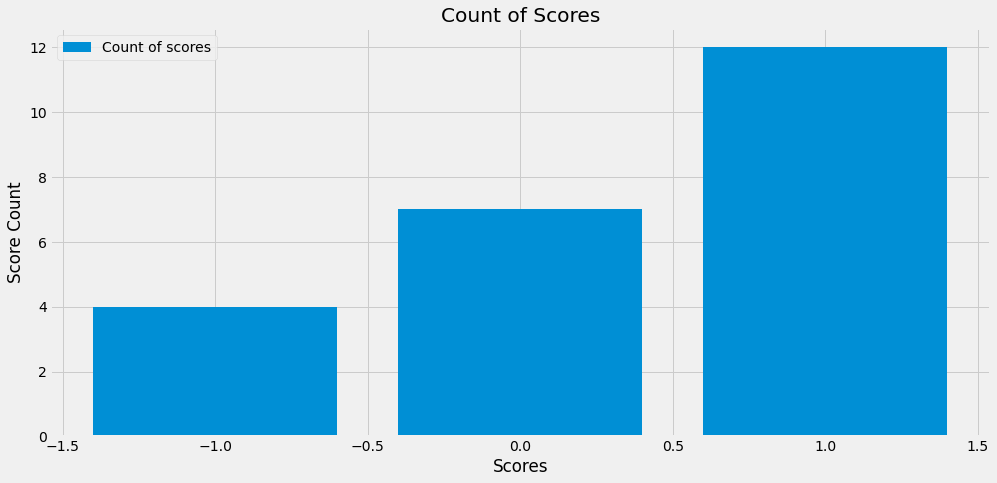

In [477]:
#1
plt.figure(figsize=(15,7))
plt.bar(height = data.groupby('Score').count()['Comment'], x = sorted(data['Score'].unique(), reverse= False), 
label="Count of scores")
plt.xlabel("Scores")
plt.ylabel("Score Count")
plt.title("Count of Scores")
plt.legend()
plt.savefig("static/plots/plot1.png", bbox_inches="tight", pad_inches=1)
plt.show()


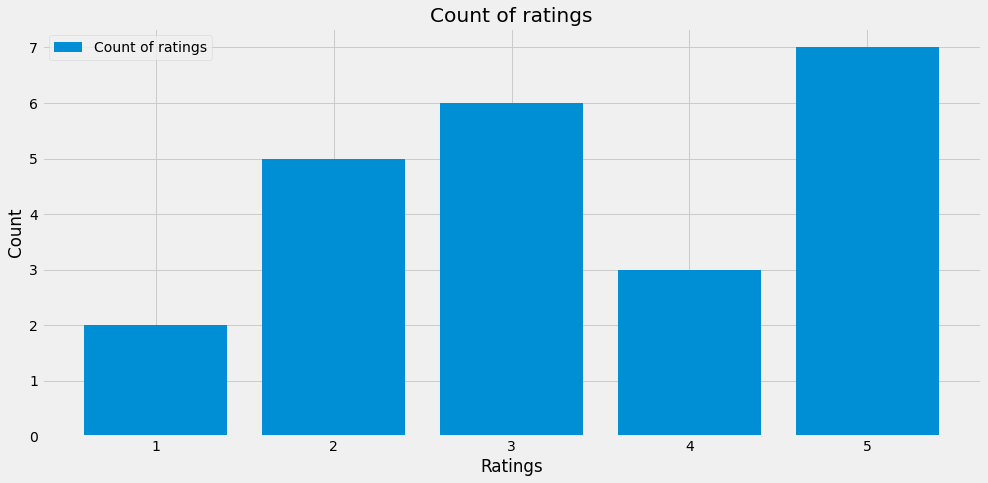

In [478]:
#2
plt.figure(figsize=(15,7))
plt.bar(height = data.groupby('Rating').count()['Comment'], x = sorted(data['Rating'].unique(), reverse= False),label="Count of ratings")
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.title("Count of ratings")
plt.legend()
plt.savefig("static/plots/plot2.png",bbox_inches="tight", pad_inches=1)
plt.show()

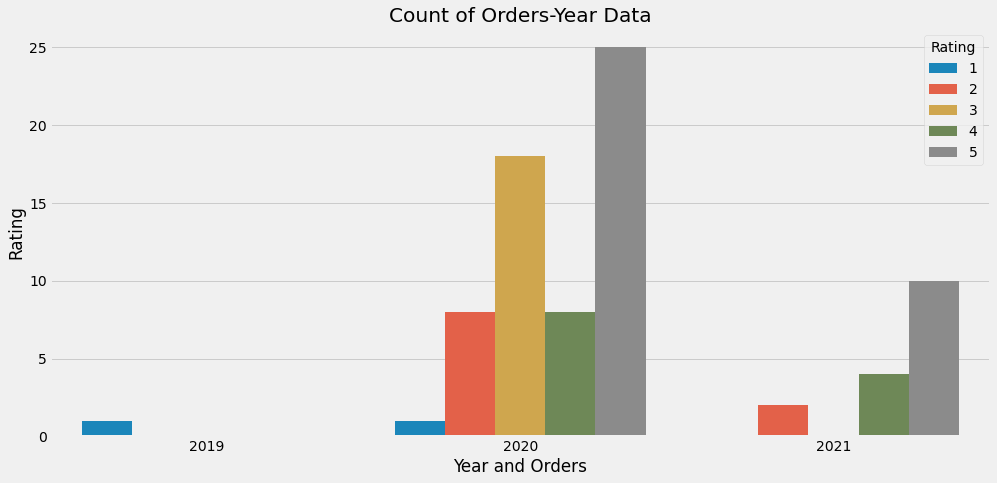

In [479]:
#3
plt.figure(figsize=(15,7))
sns.barplot(y="Rating", x="year", hue="Rating", data=data, ci = None, estimator= sum)
plt.xlabel("Year and Orders")
plt.ylabel("Rating")
plt.title("Count of Orders-Year Data")
plt.savefig("static/plots/plot3.png",bbox_inches="tight", pad_inches=1)
plt.show()

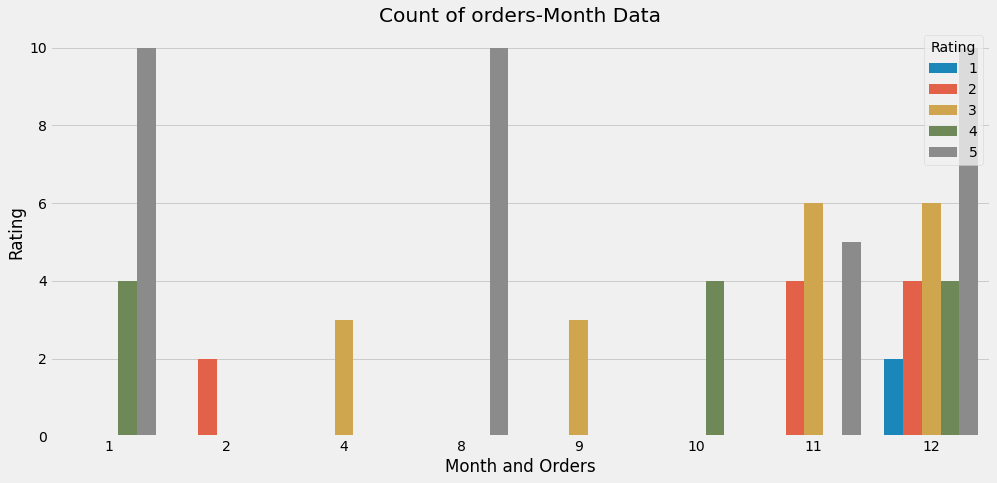

In [480]:
#4
plt.figure(figsize=(15,7))
sns.barplot(y="Rating", x="month", hue="Rating", data=data, ci = None, estimator= sum)
plt.xlabel("Month and Orders")
plt.ylabel("Rating")
plt.title("Count of orders-Month Data")
plt.savefig("static/plots/plot4.png",bbox_inches="tight", pad_inches=1)
plt.show()

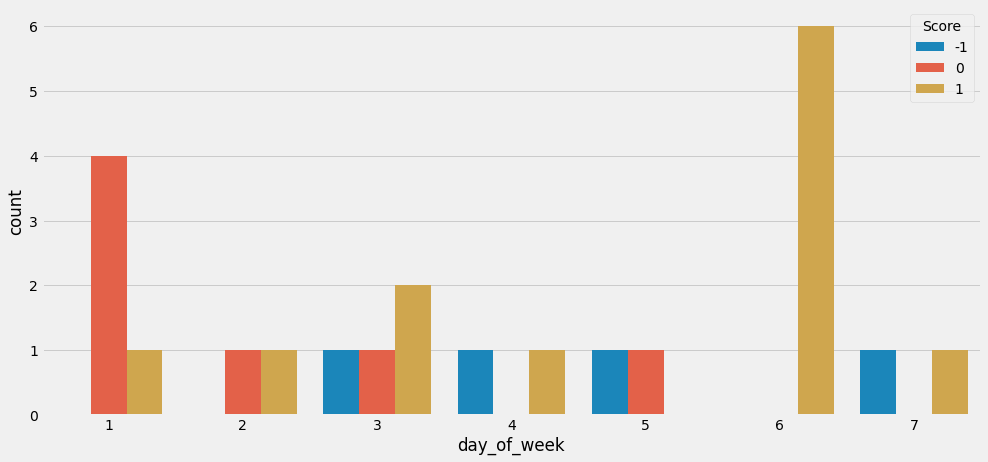

In [481]:
#5
plt.figure(figsize=(15,7))
sns.countplot(x="day_of_week", hue="Score", data=data)
plt.savefig("static/plots/plot5.png",bbox_inches="tight", pad_inches=1)
plt.show()

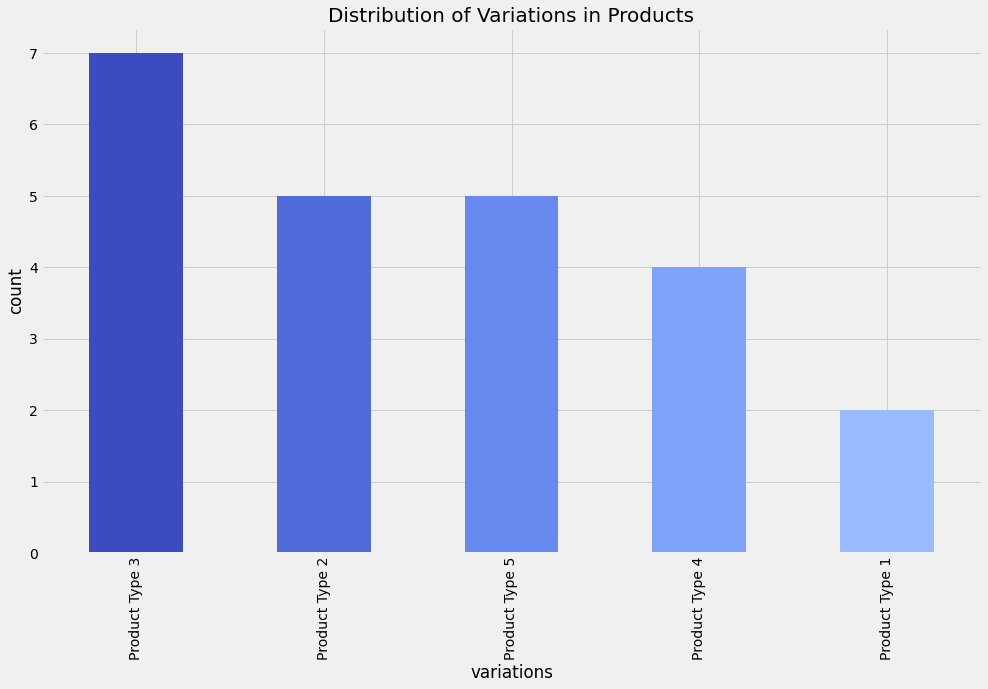

In [482]:
#6
color = plt.cm.coolwarm(np.linspace(0, 1, 15))
data['Prodtype'].value_counts().plot.bar(color = color, figsize = (15, 9))
plt.title('Distribution of Variations in Products', fontsize = 20)
plt.xlabel('variations')
plt.ylabel('count')
plt.savefig("static/plots/plot6.png",bbox_inches="tight", pad_inches=1)
plt.show()

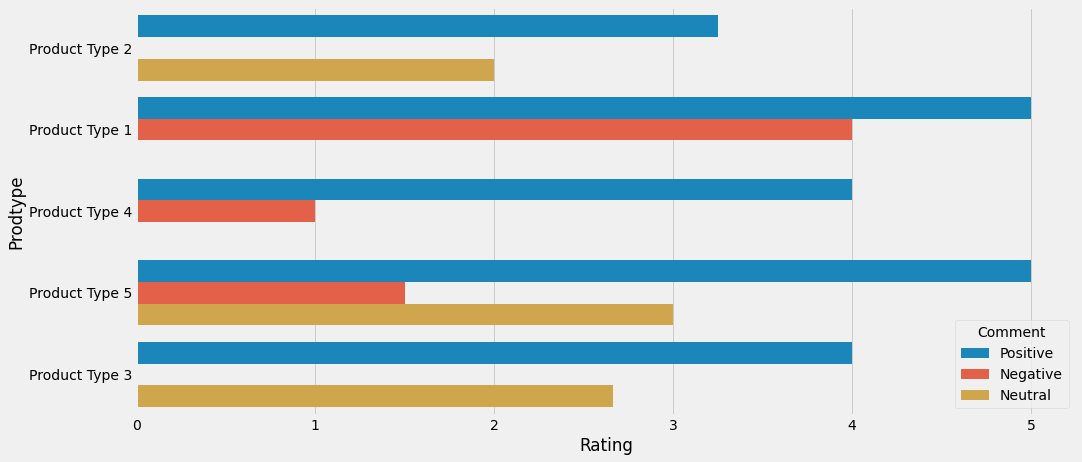

In [483]:
#7
plt.figure(figsize=(15,7))
sns.barplot(x="Rating", y="Prodtype", hue="Comment", data=data, ci = None)
plt.savefig("static/plots/plot7.png",bbox_inches="tight", pad_inches=1)
plt.show()

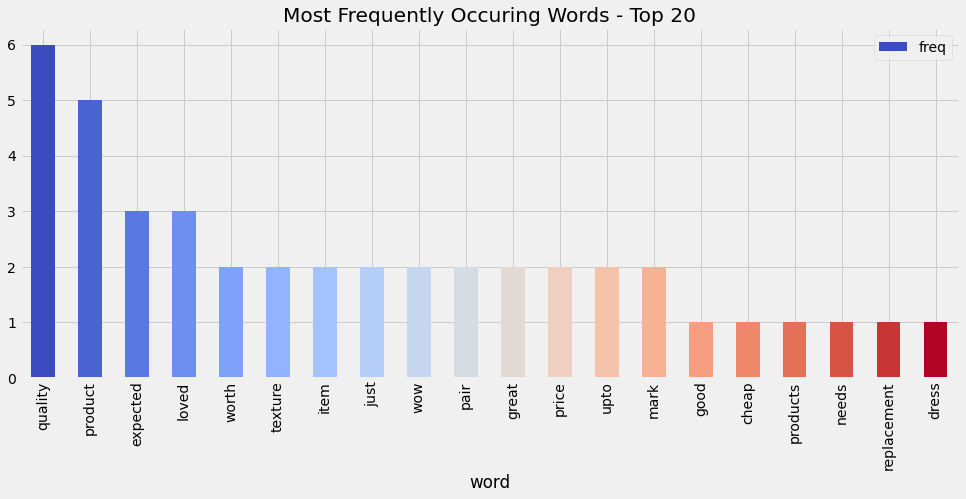

In [484]:
#8
reviews = data['Feedback']
len_review = []
for review in reviews:
    len_review.append(len(review))

data['len_of_reviews'] = len_review
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(data.Feedback)
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

plt.style.use('fivethirtyeight')
color = plt.cm.coolwarm(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = color)
plt.title("Most Frequently Occuring Words - Top 20")
plt.savefig("static/plots/plot8.png",bbox_inches="tight", pad_inches=1)
plt.show()

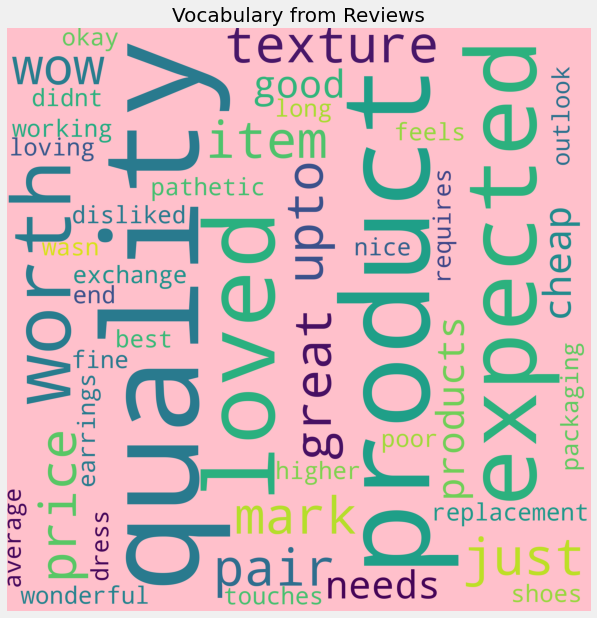

In [485]:
#9
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'pink', width = 2000, height = 2000).generate_from_frequencies(dict(words_freq))

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud)
plt.title("Vocabulary from Reviews", fontsize = 20)
plt.savefig("static/plots/plot9.png",bbox_inches="tight", pad_inches=1)
plt.show()

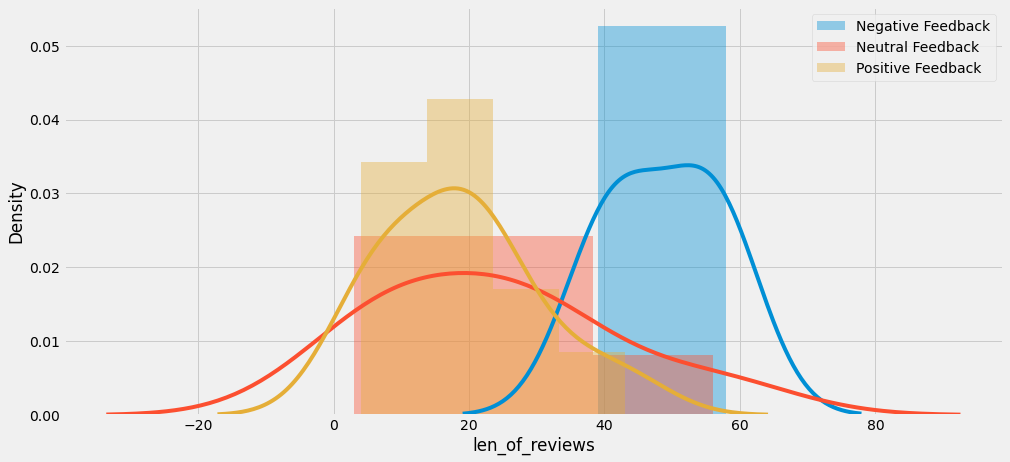

In [486]:
#10
plt.figure(figsize=(15,7))
sns.distplot(data[data['Score'] == -1]['len_of_reviews'], label = 'Negative Feedback')
sns.distplot(data[data['Score'] == 0]['len_of_reviews'], label = 'Neutral Feedback')
sns.distplot(data[data['Score'] == 1]['len_of_reviews'], label = 'Positive Feedback')
plt.legend()
plt.savefig("static/plots/plot10.png",bbox_inches="tight", pad_inches=1)
plt.show()

# **Data Preprocessing:**


In [487]:
#1
from sklearn.feature_extraction.text import TfidfVectorizer
tdf = TfidfVectorizer(stop_words='english')
pd.DataFrame(tdf.fit_transform(data['Feedback']).toarray())

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
1,0.000000,0.000000,0.436447,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.385667,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.707107,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.514287,0.000000,...,0.000000,0.000000,0.454451,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.59967,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.566989,0.000000,0.000000,0.00000,0.000000,0.000000,0.454215,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.707107
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.540533,0.000000,0.000000,0.000000,0.000000,0.540533,0.00000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.471114,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.514690,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000


In [488]:
#2
tdf_data = pd.DataFrame(tdf.fit_transform(data['Feedback']).toarray())

# **One Hot Encoding:**
For variation we will be using one hot encoding, which can be expalined by the image below.
![](https://miro.medium.com/max/2474/1*ggtP4a5YaRx6l09KQaYOnw.png)

In [489]:
#3
pd.get_dummies(data['Prodtype'], drop_first= True)

,Product Type 2,Product Type 3,Product Type 4,Product Type 5
0,1,0,0,0
1,0,0,0,0
2,0,0,1,0
3,0,0,0,1
4,0,1,0,0
5,0,1,0,0
6,1,0,0,0
7,0,0,1,0
8,0,0,0,1
9,0,1,0,0


In [490]:
#4
one_hot_data = pd.get_dummies(data['Prodtype'])
X = pd.concat([one_hot_data, tdf_data, data['month'], data['day_of_week'], data['len_of_reviews']], axis=1)
X.head()

,Product Type 1,Product Type 2,Product Type 3,Product Type 4,Product Type 5,0,1,2,3,4,...,37,38,39,40,41,42,43,month,day_of_week,len_of_reviews
0,0,1,0,0,0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,1,6,4
1,1,0,0,0,0,0.0,0.0,0.436447,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.385667,0.0,12,3,54
2,0,0,0,1,0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,12,6,17
3,0,0,0,0,1,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,12,5,44
4,0,0,1,0,0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.59967,0.000000,0.0,4,7,25


In [491]:
#5
#And the target vector y.
y = data['Score']

# K Fold Cross Validation:

In [492]:
#1
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score

rf = RandomForestClassifier()

k_fold = KFold(n_splits=5)

cross_val_score(rf, X, y, cv=k_fold, scoring='accuracy')

array([0.6 , 0.6 , 0.6 , 0.25, 0.25])

In [493]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Random Forest Classifier:

In [494]:
#2
rf = RandomForestClassifier()
fit_model = rf.fit(X_train, y_train)

In [495]:
t = zip(fit_model.feature_importances_, X_train.columns)
t1 = reversed(sorted(t , key=lambda x: x[0]))
i = 0
for element in t1:
    if (i < 10):
        print(element)
        i = i + 1

(0.18401477198438262, 'day_of_week')
(0.1508795940091542, 'len_of_reviews')
(0.08806271891840604, 'Product Type 2')
(0.047867293964847756, 19)
(0.04447233780809174, 'month')
(0.042489608191315656, 'Product Type 5')
(0.0372591952464908, 15)
(0.031013416602067537, 30)
(0.030646505391503834, 24)
(0.023165166431447518, 'Product Type 4')


In [496]:
y_pred = rf.predict(X_test)

# Learning Curve:

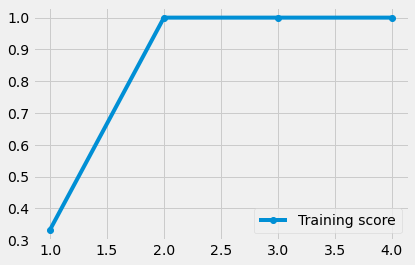

In [507]:
#3   Training score learning curve
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), X_train, y_train, scoring='f1', train_sizes=np.linspace(0.1, 1.0, 20), cv = 3)

train_scores = np.mean(train_scores, axis = 1)
test_scores = np.mean(test_scores, axis = 1)

plt.plot(train_sizes, train_scores, 'o-', label="Training score")
#plt.plot(train_sizes, test_scores, 'o-', label="Cross-validation score")
plt.legend();

In [498]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

In [499]:
print("For Random Forest Classifier:\n")
print("Accuracy Score: ",accuracy_score(y_test, y_pred))
print("Precision Score: ",precision_score(y_test, y_pred,average='weighted'))
print("Recall Score: ",recall_score(y_test, y_pred,average='weighted'))
print("F1 Score: ",f1_score(y_test, y_pred,average='weighted'))
print("Confusion Matrix:\t \n",confusion_matrix(y_test, y_pred))

For Random Forest Classifier:

Accuracy Score:  0.42857142857142855
Precision Score:  0.18367346938775508
Recall Score:  0.42857142857142855
F1 Score:  0.2571428571428571
Confusion Matrix:	 
 [[0 0 2]
 [0 0 2]
 [0 0 3]]


# Gradient Boosting Classifier:

In [500]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("For Gradient Boosting Classifier:\n")
print("Accuracy Score: ",accuracy_score(y_test, y_pred))
print("Precision Score: ",precision_score(y_test, y_pred,average='weighted'))
print("Recall Score: ",recall_score(y_test, y_pred,average='weighted'))
print("F1 Score: ",f1_score(y_test, y_pred,average='weighted'))
print("Confusion Matrix:\t \n",confusion_matrix(y_test, y_pred))

For Gradient Boosting Classifier:

Accuracy Score:  0.42857142857142855
Precision Score:  0.18367346938775508
Recall Score:  0.42857142857142855
F1 Score:  0.2571428571428571
Confusion Matrix:	 
 [[0 0 2]
 [0 0 2]
 [0 0 3]]


In [501]:
results = pd.DataFrame(data = {'Y Test': y_test, 'Y Predictions': y_pred})
results.head()

,Y Test,Y Predictions
9,0,1
8,1,1
10,1,1
0,1,1
5,0,1


In [502]:
results.to_csv('Output.csv')